<a href="https://www.kaggle.com/code/manthanvarmas/health-is-important-guys?scriptVersionId=247620805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv('/kaggle/input/health-and-lifestyle-dataset/synthetic_health_lifestyle_dataset.csv')
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


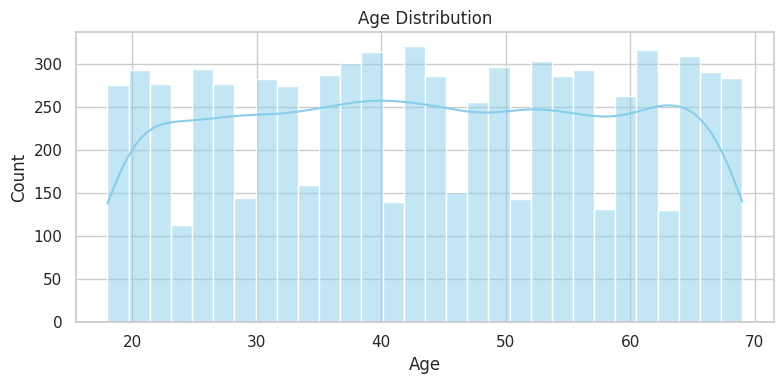

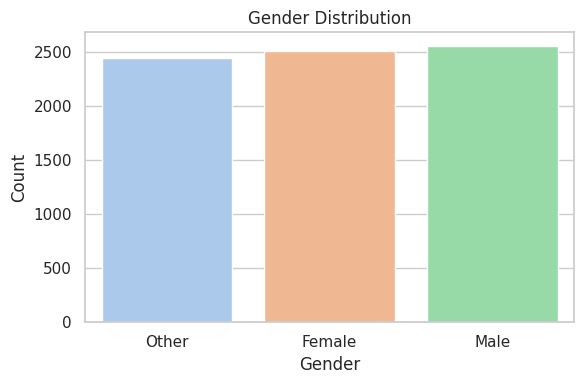

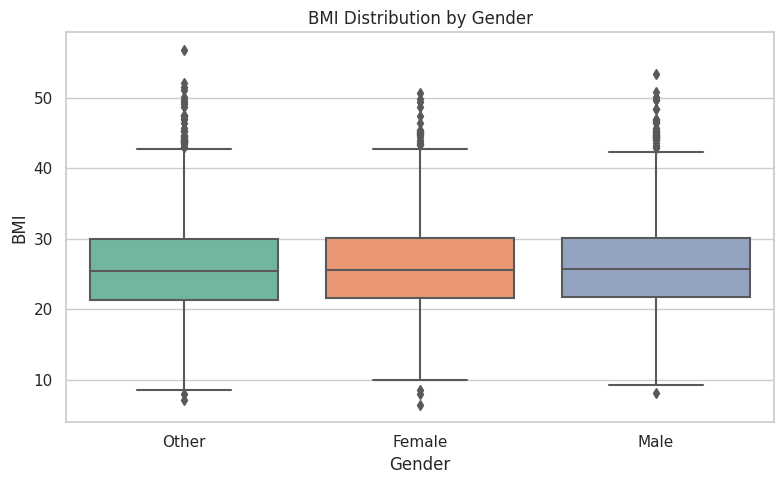

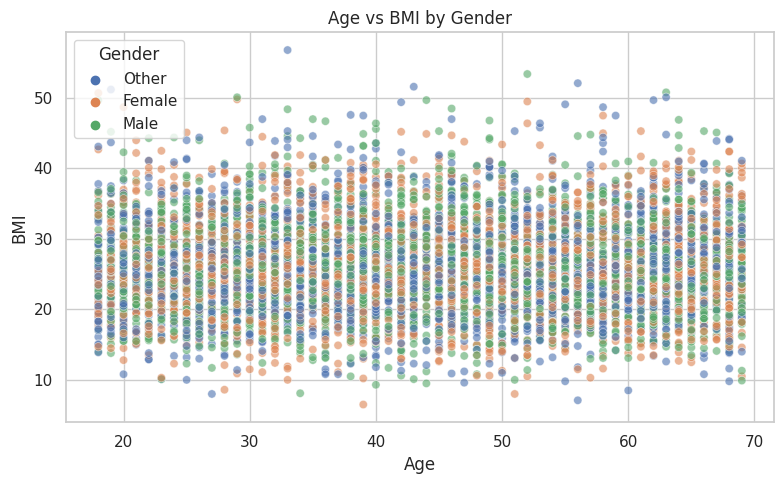

In [3]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# BMI Distribution by Gender - Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

# Age vs BMI - Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='BMI', hue='Gender', data=df, alpha=0.6)
plt.title('Age vs BMI by Gender')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

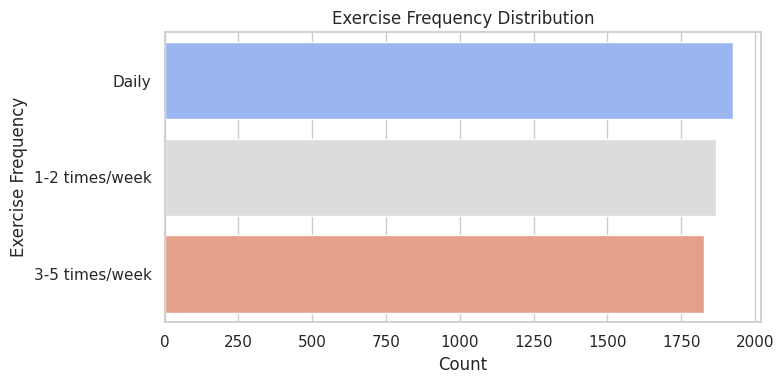

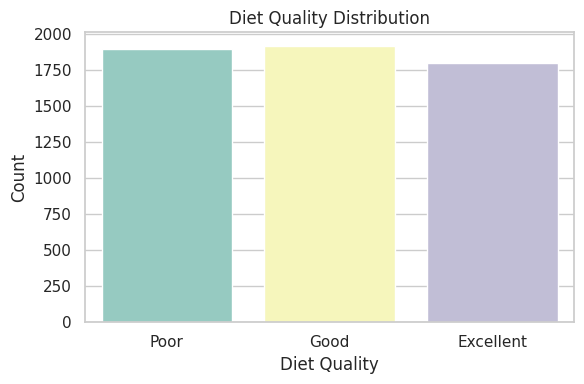

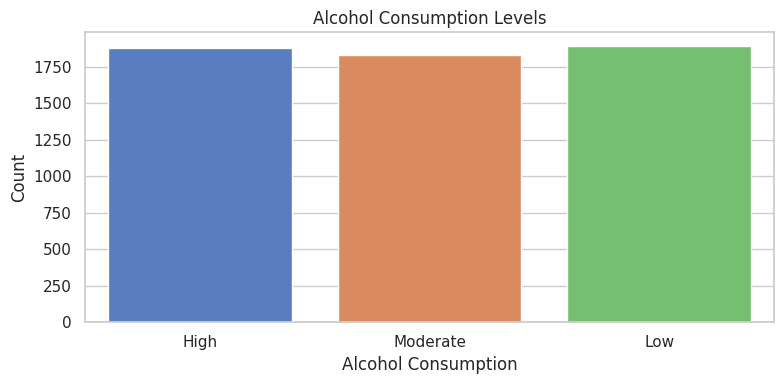

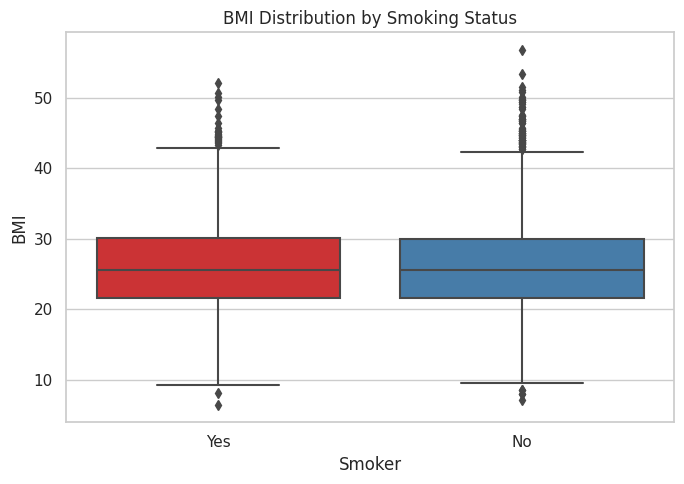

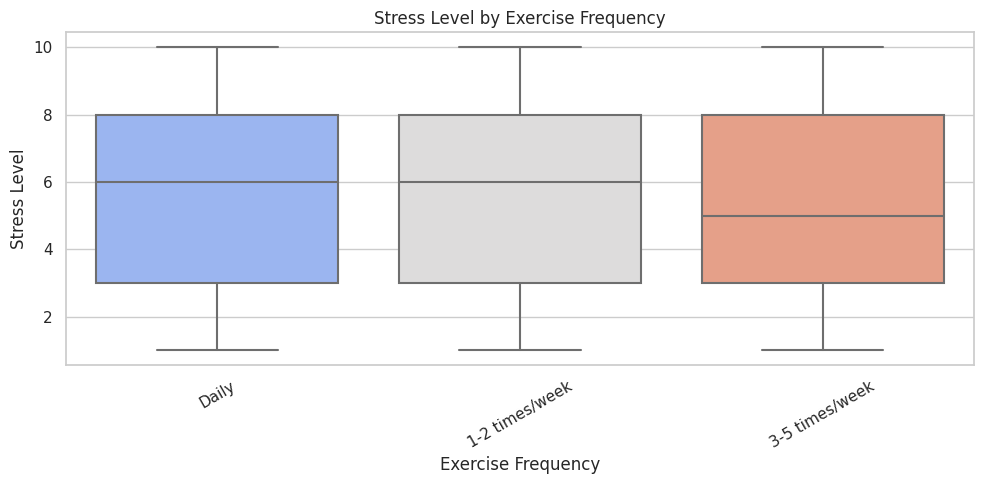

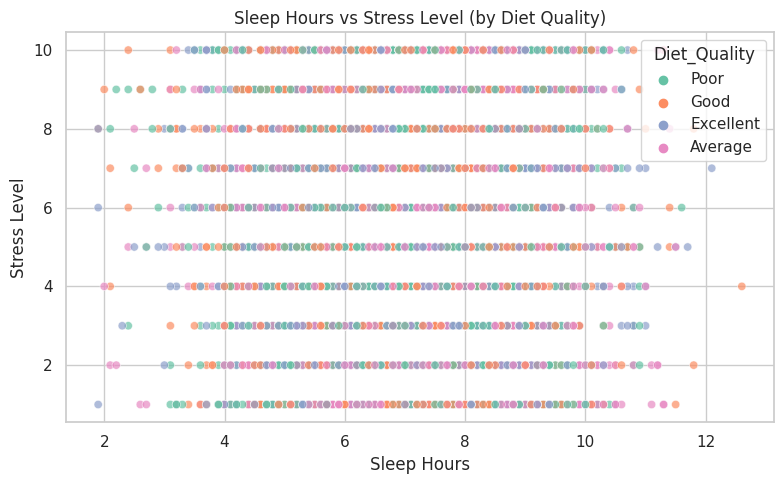

In [4]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Exercise_Freq', data=df, order=df['Exercise_Freq'].value_counts().index, palette='coolwarm')
plt.title('Exercise Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('Exercise Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Diet_Quality', data=df, order=['Poor', 'Good', 'Excellent'], palette='Set3')
plt.title('Diet Quality Distribution')
plt.xlabel('Diet Quality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Alcohol_Consumption', data=df, palette='muted')
plt.title('Alcohol Consumption Levels')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='Smoker', y='BMI', data=df, palette='Set1')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Exercise_Freq', y='Stress_Level', data=df, palette='coolwarm', order=df['Exercise_Freq'].value_counts().index)
plt.title('Stress Level by Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Stress Level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sleep_Hours', y='Stress_Level', hue='Diet_Quality', data=df, alpha=0.7, palette='Set2')
plt.title('Sleep Hours vs Stress Level (by Diet Quality)')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

In [5]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

In [6]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours,BMI_Category
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5,Underweight
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9,Normal
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8,Overweight
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6,Overweight
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1,Normal


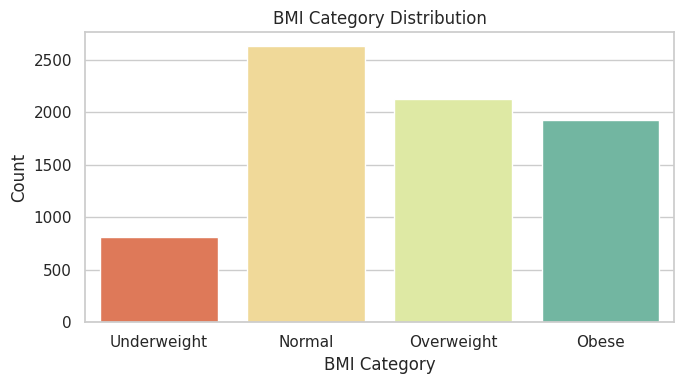

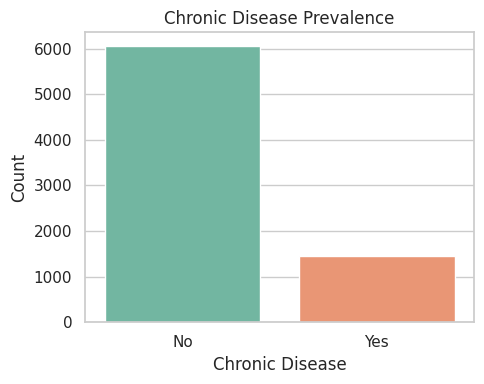

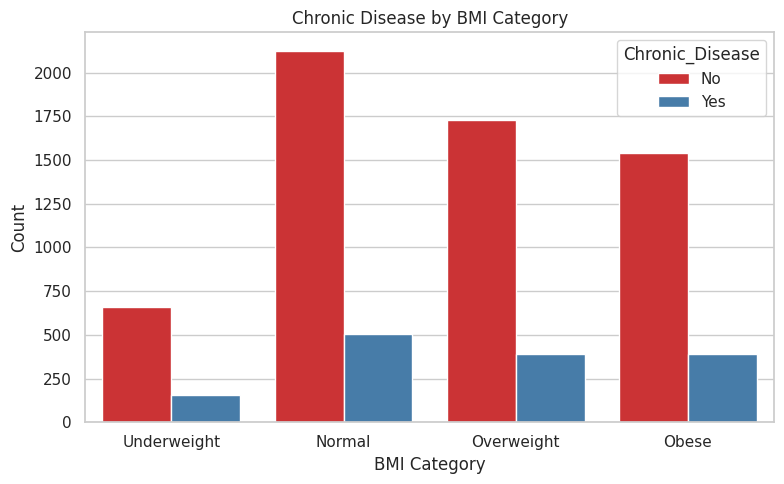

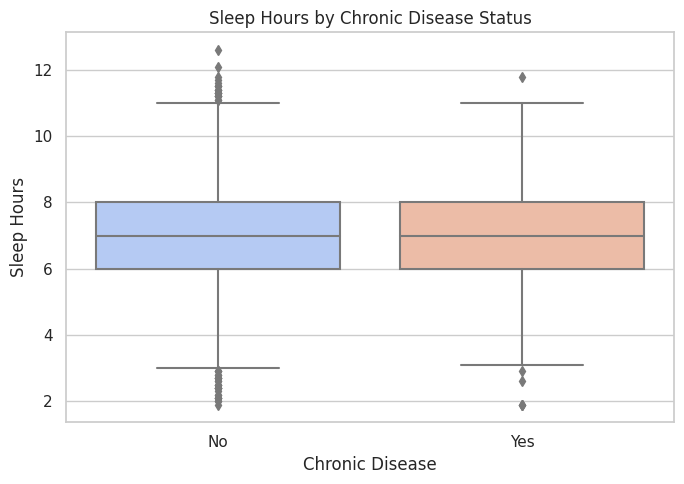

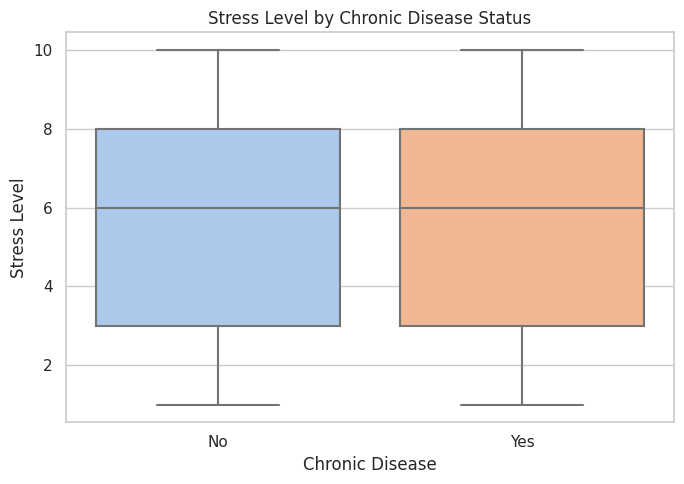

In [7]:
plt.figure(figsize=(7, 4))
sns.countplot(x='BMI_Category', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'], palette='Spectral')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(x='Chronic_Disease', data=df, palette='Set2')
plt.title('Chronic Disease Prevalence')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='BMI_Category', hue='Chronic_Disease', data=df, palette='Set1', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Chronic Disease by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='Chronic_Disease', y='Sleep_Hours', data=df, palette='coolwarm')
plt.title('Sleep Hours by Chronic Disease Status')
plt.xlabel('Chronic Disease')
plt.ylabel('Sleep Hours')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='Chronic_Disease', y='Stress_Level', data=df, palette='pastel')
plt.title('Stress Level by Chronic Disease Status')
plt.xlabel('Chronic Disease')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

In [8]:
df

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours,BMI_Category
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5,Underweight
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9,Normal
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8,Overweight
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6,Overweight
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7496,55,Other,168.3,52.4,18.5,Yes,1-2 times/week,Average,Moderate,Yes,4,5.5,Normal
7496,7497,24,Male,179.1,58.8,18.3,No,3-5 times/week,Excellent,Moderate,No,5,7.6,Underweight
7497,7498,61,Other,160.2,80.0,31.2,No,3-5 times/week,Poor,Moderate,No,5,6.2,Obese
7498,7499,40,Female,172.6,66.1,22.2,No,1-2 times/week,Good,Low,No,9,6.1,Normal


In [9]:
# Filter underweight individuals
underweight_df = df[df['BMI_Category'] == 'Underweight']

# Calculate proportion of each category for lifestyle and health features
underweight_summary = underweight_df[['Smoker', 'Exercise_Freq', 'Diet_Quality',
                                      'Alcohol_Consumption', 'Chronic_Disease']].apply(lambda x: x.value_counts(normalize=True))

# Calculate the same proportions for the entire dataset
overall_summary = df[['Smoker', 'Exercise_Freq', 'Diet_Quality',
                      'Alcohol_Consumption', 'Chronic_Disease']].apply(lambda x: x.value_counts(normalize=True))

# Display both summaries side by side for comparison
print("Underweight Group (%)")
print((underweight_summary * 100).round(2))

print("\nOverall Population (%)")
print((overall_summary * 100).round(2))

Underweight Group (%)
                Smoker  Exercise_Freq  Diet_Quality  Alcohol_Consumption  \
1-2 times/week     NaN          33.65           NaN                  NaN   
3-5 times/week     NaN          29.65           NaN                  NaN   
Average            NaN            NaN         23.59                  NaN   
Daily              NaN          36.70           NaN                  NaN   
Excellent          NaN            NaN         22.48                  NaN   
Good               NaN            NaN         26.29                  NaN   
High               NaN            NaN           NaN                36.50   
Low                NaN            NaN           NaN                32.67   
Moderate           NaN            NaN           NaN                30.83   
No               69.53            NaN           NaN                  NaN   
Poor               NaN            NaN         27.64                  NaN   
Yes              30.47            NaN           NaN               

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

Underweight people exercise slightly more frequently, especially daily. This could suggest that over-exercising or high activity levels might contribute to being underweight.

Underweight people have a slightly higher proportion of poor diets, and a slightly lower percentage with excellent diets.

 Underweight individuals show a slightly higher rate of high alcohol consumption.

 No significant difference in chronic disease prevalence between underweight individuals and the overall population.
 

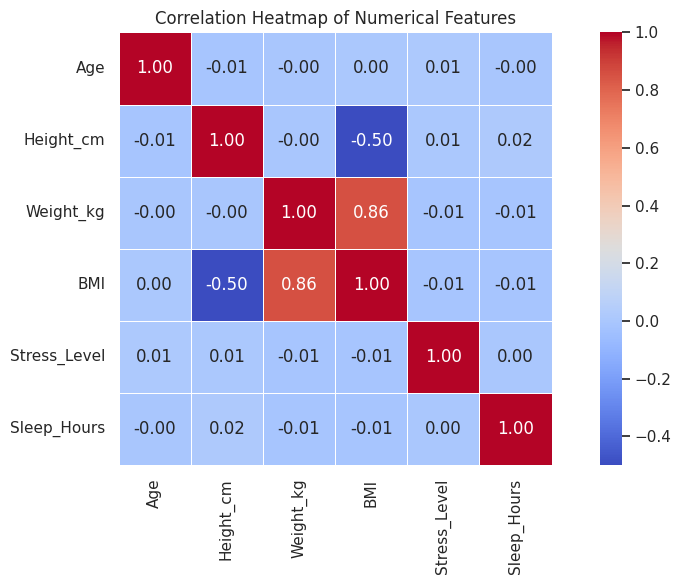

In [10]:
numerical_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Stress_Level', 'Sleep_Hours']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [11]:
smokers = df[df['Smoker'] == 'Yes']['Stress_Level']
non_smokers = df[df['Smoker'] == 'No']['Stress_Level']
t_stat1, p_val1 = stats.ttest_ind(smokers, non_smokers)

with_disease = df[df['Chronic_Disease'] == 'Yes']['Sleep_Hours']
without_disease = df[df['Chronic_Disease'] == 'No']['Sleep_Hours']
t_stat2, p_val2 = stats.ttest_ind(with_disease, without_disease)

groups = [group['Stress_Level'].values for name, group in df.groupby('Diet_Quality')]
f_stat, p_val3 = stats.f_oneway(*groups)

In [12]:
print("1. Smoking vs Stress Level (t-test):")
print(f"   t-statistic = {t_stat1:.2f}, p-value = {p_val1:.4f}")

print("\n2. Chronic Disease vs Sleep Hours (t-test):")
print(f"   t-statistic = {t_stat2:.2f}, p-value = {p_val2:.4f}")

print("\n3. Diet Quality vs Stress Level (ANOVA):")
print(f"   F-statistic = {f_stat:.2f}, p-value = {p_val3:.4f}")

1. Smoking vs Stress Level (t-test):
   t-statistic = 0.07, p-value = 0.9439

2. Chronic Disease vs Sleep Hours (t-test):
   t-statistic = 0.10, p-value = 0.9176

3. Diet Quality vs Stress Level (ANOVA):
   F-statistic = 1.59, p-value = 0.1902
